# Regresión Lineal

## 1. Librerias y configuraciones previas


In [27]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

#Creación de modelo
import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [28]:
# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):
    
    #A los datos de entrada 'X' se le adiciona una constante
    X = sm.add_constant(X) 
    
    #Se crea y se entrena el modelo de regresion lineal q(statsmodels.api) con 
    #los datos de entrada 'X' y los datos de salida 'y'
    lm = sm.OLS(y,X).fit()
    
    #imprime el resumen del modelo creado
    print(lm.summary()) # model summary
    
    return X

In [29]:
#Funcion Lineal: dado una pendiente 'm', un valor x, y un coeficiente 'b', retorna el valor de 'y'

def f(m, x, b):
    return (m*x)+b

## 3. Carga del dataset

In [30]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d=pd.read_csv('./datasets/01_carDetailsV4_Prep.csv')

In [31]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [32]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [33]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1655 non-null   float64
 1   Year                1655 non-null   float64
 2   Kilometer           1655 non-null   float64
 3   Engine              1655 non-null   float64
 4   Length              1655 non-null   float64
 5   Width               1655 non-null   float64
 6   Height              1655 non-null   float64
 7   Seating Capacity    1655 non-null   float64
 8   Fuel Tank Capacity  1655 non-null   float64
 9   Fuel Type           1655 non-null   object 
 10  Transmission        1655 non-null   object 
 11  Owner               1655 non-null   object 
 12  Seller Type         1655 non-null   object 
 13  Drivetrain          1655 non-null   object 
 14  PriceRange          1655 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 194.1+

In [34]:
d.head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Fuel Type,Transmission,Owner,Seller Type,Drivetrain,PriceRange
0,505000.00,2017.00,87150.00,1198.00,3990.00,1680.00,1505.00,5.00,35.00,Petrol,Manual,First,Corporate,FWD,1
1,450000.00,2014.00,75000.00,1248.00,3995.00,1695.00,1555.00,5.00,42.00,Diesel,Manual,Second,Individual,FWD,1
2,220000.00,2011.00,67000.00,1197.00,3585.00,1595.00,1550.00,5.00,35.00,Petrol,Manual,First,Individual,FWD,1
3,799000.00,2019.00,37500.00,1197.00,3995.00,1745.00,1510.00,5.00,37.00,Petrol,Manual,First,Individual,FWD,3
4,1950000.00,2018.00,69000.00,2393.00,4735.00,1830.00,1795.00,7.00,55.00,Diesel,Manual,First,Individual,RWD,3


## 5. Creación del modelo

### Dividir el conjunto de datos

In [35]:
#Se establece la variable de entrada 'X' y la variable de salida 'y'

X = d[['Engine']]
y = d['Price']

In [36]:
# División de los datos en train y test

#En este caso, el 70% de los datos se utilizarán para entrenar el modelo. 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

### Creación del modelo

In [37]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

#modelo = linear_model.LinearRegression()
#modelo = modelo.fit( X_train, y_train)

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          2.16e-163
Time:                        08:03:24   Log-Likelihood:                -17149.
No. Observations:                1158   AIC:                         3.430e+04
Df Residuals:                    1156   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.161e+05   5.94e+04    -12.058      0.0

## 6. Diagnóstico errores (residuos)

In [38]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento

#Reducción de dimensionalidad del dataset: se convierte en una dimensión
y_train = y_train.flatten()

#Se realiza la predicción sobre los datos de entrenamiento
prediccion_train = modelo.predict(X_train)

#Se calculan los residuos: diferencia entre la prediccion y el valor real en los datos de entreanamiento 
residuos_train   = prediccion_train - y_train

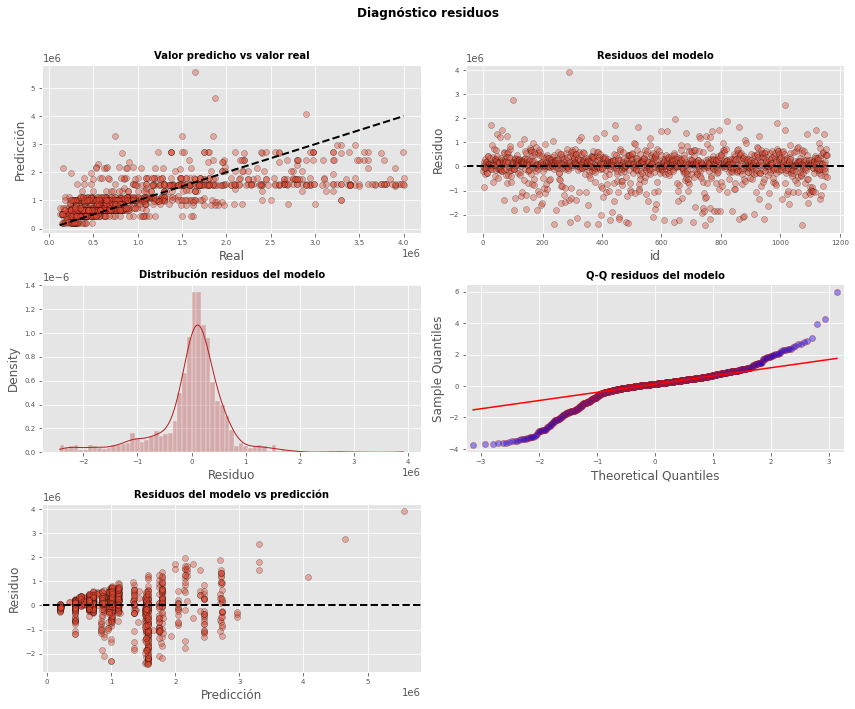

In [39]:
# Gráficos para el pronóstico de residuos

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)


axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

## 7. Evaluar el desempeño del modelo


El modelo es evaluado usando el dataset de prueba para que no haya perdida  de información desde el entrenamiento del modelo.


Como primer paso, se calcula un conjunto de métricas de desempeño. Hay muchas métricas posibles utilizadas para la evaluación de modelos de regresión. En general, estas métricas son funciones del **valor residual**, o diferencia entre el valor predicho o *score* y el valor real de la etiqueta:


$$r_i = f(x_i) - y_i = \hat{y}_i - y_i$$

Algunas de las metricas más comunes son:

- **Error medio cuadrado (Mean squared error)** o MSE,  
$$MSE = \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2$$

El error medio cuadrado es idéntico a la varianza de los residuos (con un ligero sesgo). Recordemos que esta métrica es la que minimiza la regresión lineal. Observe que el error cuadrático medio está en unidades del cuadrado de los valores de la etiqueta.

- **Raiz del error cuadrático medio (Root mean squared error)** o RMSE,  
$$RMSE = \sqrt{ \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2}$$

Raiz del error cuadrático medio es idéntico a la desviación estándar de los residuos (de nuevo, con un ligero sesgo). El error cuadrático medio está en las mismas unidades que los valores de la etiqueta.

- **Error absoluto promedio (Mean absolute error)** o MAE,
$$MAE = \frac{1}{N} \sum_{i=1}^N |f(x_i) - y_i|$$  
donde $||$ es el operador del valor absoluto.  

Es similar en interpretación a la raiíz del error cuadrático medio. Puede encontrar esta medida más intuitiva ya que es simplemente el promedio de la magnitud de los residuos.
 
- **Error absoluto medio (Median absolute error)**,
$$Median\ Absolute\ Error = Median \big( \sum_{i=1}^N |f(x_i) - y_i| \big)$$   

El error absoluto medio es una medida robusta de ubicación de los residuos absolutos. *Si esta medida es significativamente diferente del error absoluto promedio, es probable que haya valores atípicos en los residuos*.


- **$R^2$** o **Coeficiente de determinación**,  
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$  
donde,   
$SS_{res} = \sum_{i=1}^N r_i^2$, o la suma de los residuos cuadrados,   
$SS_{res} = \sum_{i=1}^N y_i^2$, o la suma de los valores de la etiqueta al cuadrado.  

En otras palabras, $R^2$ es la medida de la reducción en la suma de valores al cuadrado entre los valores de etiqueta sin procesar y los residuos. 

Si el modelo no ha reducido la suma de cuadrados de las etiquetas (es un modelo inútil!), $R^2=0$. 

si el modelo se ajusta perfectamente a los datos, todos $r_i= 0$, entonces $R^2=1$.


- **$R^2_{adj}$** es $R^2$ ajustado por grados de libertad en el modelo,
$$R^2_{adj} = 1 - \frac{var(r)}{var(y)} = 1 - \frac{\frac{SS_{res}}{(n - p -1)}}{\frac{SS_{tot}}{(n-1)}}$$  
donde,   
$var(r) = $ la varianza de los residuales,   
$var(y) = $ la varianza de las etiquetas,
$n = $ número de ejemplos o casos,
$p = $ numero de parametros.  

The interpretation of $R^2_{adj}$ is the same as $R^2$. In many cases there will be little difference. However if the number of parameters is significant with respect to the number of cases, $R^2$ will give an overly optimistic measure of model performance. In general, the difference between $R^2_{adj}$ and $R^2$ becomes less significant as the number of cases $n$ grows. However, even for 'big data' models there can be a significant difference if there are a large number of model parameters.   

In [40]:
# Error de test del modelo 

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)

mse = mean_squared_error (y_true  = y_test, y_pred  = predicciones, squared = True)
rmse = mean_squared_error (y_true  = y_test, y_pred  = predicciones, squared = False)
MAE = mean_absolute_error (y_true  = y_test, y_pred  = predicciones)
MedAE = median_absolute_error (y_true  = y_test, y_pred  = predicciones)
r2 = r2_score (y_true  = y_test, y_pred  = predicciones)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El R2    de test es: {r2}")

El error MSE   de test es: 495394942246.5735
El error RMSE  de test es: 703842.9812440936
El error MAE   de test es: 488405.3338738438
El error MedAE de test es: 312319.7987854633
El R2    de test es: 0.42784939256850507


## 9. Predicción-Prueba

Primero identificamos cuáles son posibles valores para `Engine` e identificar posibles `Price` para dicho *Engine*

In [41]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Se agrupan todos los posibles valores de Engine
d.groupby(['Engine'])['Price'].agg(['count', 'mean','median', 'var']).head()

,count,mean,median,var
Engine,,,,
793.00,1,299000.00,299000.00,NaN
796.00,26,269692.27,272500.00,6853890313.88
799.00,9,332555.33,319000.00,4251021555.75
814.00,12,265000.00,262500.00,3850000000.00
920.40,1,204999.00,204999.00,NaN


In [42]:
#Descripción de Engine
print(d['Engine'].describe())

count   1655.00
mean    1580.76
std      539.94
min      793.00
25%     1197.00
50%     1493.00
75%     1968.00
max     5461.00
Name: Engine, dtype: float64


In [43]:
# Se agrupa en bins de a 100 los valores de Engine y se calcula la media y mediana de precio 
# para los vehiculos de este rango de Engine

#Se crea una lista que empieza en 700 y finaliza en 5500 y se incrementa de a 100
bins = list(range(700, 5500, 100))

# Aplicamos pd.cut() para agrupar la variable Engine en los rangos definidos
d['range'] = pd.cut(d['Engine'], bins=bins)

# Creamos un nuevo dataframe con la nueva columna de rangos, rellenando con 0 los precios para aquellos rangos 
# que no tengan ningun elemento
resultados = d.groupby('range')['Price'].agg(['mean', 'median', 'std']).fillna(0)

# Se reinicia los indices para almacenar en una nueva columna del dataframe el rango
resultados.reset_index(inplace=True)

resultados.head()

,range,mean,median,std
0,"(700, 800]",286222.14,285000.00,81406.17
1,"(800, 900]",265000.00,262500.00,62048.37
2,"(900, 1000]",494550.96,390000.00,301406.23
3,"(1000, 1100]",285694.31,237000.00,143658.80
4,"(1100, 1200]",537375.70,535000.00,173572.09


In [44]:
# Se generan 2 nuevas columnas a partir del rango de Engine generado anteriormente: rango superior y rango inferior 
resultados['rangoInf'] = resultados['range'].apply(lambda x: x.left)
resultados['rangoSup'] = resultados['range'].apply(lambda x: x.right)


# Se generan 2 nuevas columnas a partir la desviacion estándar 
resultados['medStdInf'] = resultados['median'] - resultados['std']
resultados['medStdSup'] = resultados['median'] + resultados['std']

# Se reordenan las columnas 
ordenColumnas = ['range', 'rangoInf', 'rangoSup', 'mean', 'std','medStdInf','median', 'medStdSup']
resultados = resultados.reindex(columns=ordenColumnas)

resultados.head()

,range,rangoInf,rangoSup,mean,std,medStdInf,median,medStdSup
0,"(700, 800]",700,800,286222.14,81406.17,203593.83,285000.00,366406.17
1,"(800, 900]",800,900,265000.00,62048.37,200451.63,262500.00,324548.37
2,"(900, 1000]",900,1000,494550.96,301406.23,88593.77,390000.00,691406.23
3,"(1000, 1100]",1000,1100,285694.31,143658.80,93341.20,237000.00,380658.80
4,"(1100, 1200]",1100,1200,537375.70,173572.09,361427.91,535000.00,708572.09


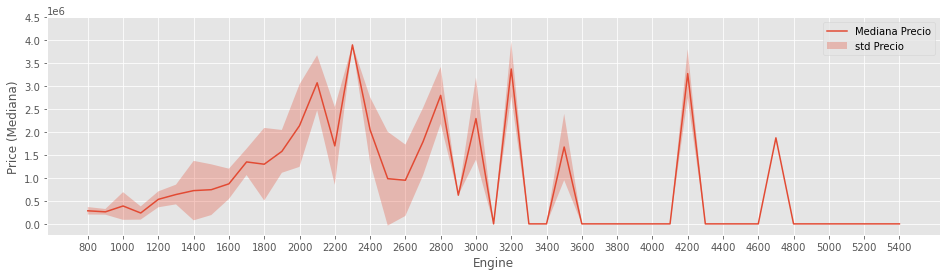

In [45]:
# Gráfica Engine vs Price  

# Se crea la figura con un tamaño establecido (en pulgadas)
fig = plt.figure(figsize=(16, 4))

# Se adiciona una una gráfica a la figura creada anteriormente 
ax = fig.add_subplot()

# Se crean las listas con los valores para la gráfica
x = resultados['rangoSup'].tolist()
y = resultados['median'].tolist()
std = resultados[ 'std'].tolist()


# Se grafica la línea principal
ax.plot(x, y, label='Mediana Precio')


# Se rellena el área entre la línea principal y la desviación estándar
ax.fill_between(x, 
                [y_i - std_i for y_i, std_i in zip(y, std)], 
                [y_i + std_i for y_i, std_i in zip(y, std)], 
                alpha=0.3, 
                label='std Precio')

# Se agregan títulos y etiquetas de ejes
plt.xlabel('Engine')
plt.ylabel('Price (Mediana)')

#Se le dan valores a los ejes
plt.xticks(np.arange(800, 5600, 200))
plt.yticks(np.arange(0, 5000000, 500000))

# Leyenda
ax.legend(loc="upper right")

# Mostrar la gráfica
plt.show()

### Probando el modelo

In [54]:
# Hacer predicciones sobre valores particulares

#Valor para Engine
engine =  900

engine = float(engine)

# Se adiciona el valor a un array y se incluye la contante 1
v = np.array([1, engine])

#Se realiza la predicción pasando el array con el valor del Engine
prediccion = modelo.predict(exog = v)

#Se imprime el precio calculado de venta a partir del modelo
print('El precio del vehículo: {:,.0f}'.format(prediccion.item()))

El precio del vehículo: 318,534


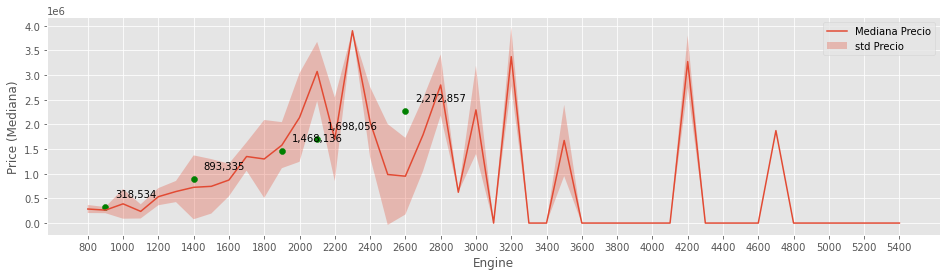

In [55]:
ax.scatter(engine, prediccion, color='Green')

ax.annotate('{:,.0f}'.format(prediccion.item()), (engine, prediccion), xytext=(10,10), textcoords='offset points')


fig

### Visualización del modelo

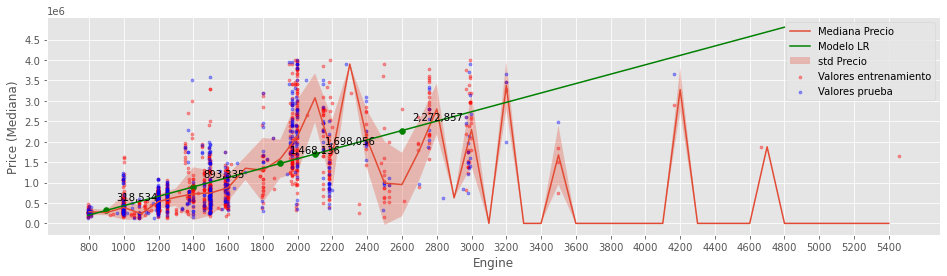

In [56]:
# Se grafica el modelo que es una función lineal de la forma y=mx+b y para el cual se definió 
# una funcion previamente al inicio de este cuaderno


# Tanto b como m son conocidas desde el model summary en la creación de modelo 
b = -716100     #const del modelo
m = 1149.6022   #Coerf de Engine


# El valor de 'x' corresponde a la lista de todos los posibles valores que puede tomar Engine (entre 793 y 5461)
x = range(793, 4800)


# Se gráfica la linea utilizando 'x' y la funccion y = f(m,i,b) 
ax.plot(x, [f(m,i,b) for i in x], color = 'green', label='Modelo LR')


#Se adicionan a la gráfica los valores reales de entrenamiento y prueba
ax.scatter(X_train['Engine'] , y_train, s=10, alpha = 0.4, color = 'red', label='Valores entrenamiento')
ax.scatter(X_test['Engine'] , y_test, s=10, alpha = 0.4, color = 'blue', label='Valores prueba')

ax.legend(loc="upper right")

fig

#### Referencias

- https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
- https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
- https://scikit-learn.org/stable/
- https://scikit-learn.org/stable/user_guide.html\
- https://jdvelasq.github.io/courses/analitica-de-grandes-datos/index.html